In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [4]:
fulf_cntr_info=pd.read_csv('fulfilment_center_info.csv')
fulf_cntr_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_with_ctrs=pd.merge(df,fulf_cntr_info,on='center_id')
test_with_ctrs=pd.merge(test,fulf_cntr_info,on='center_id')
test_with_ctrs.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [6]:
meal_info=pd.read_csv('meal_info.csv')
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df_final=pd.merge(df_with_ctrs,meal_info,on='meal_id')
test_final=pd.merge(test_with_ctrs,meal_info,on='meal_id')
df_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [8]:
columns_to_drop=['center_id','meal_id']
df_final.drop(labels=columns_to_drop,axis=1,inplace=True)
test_final.drop(labels=columns_to_drop,axis=1,inplace=True)
df_final.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [9]:
df_final.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [10]:
df_final_dummies=pd.get_dummies(df_final)
test_final_dummies=pd.get_dummies(test_final)
test_final_dummies.T.head(31)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,32533,32534,32535,32536,32537,32538,32539,32540,32541,32542,32543,32544,32545,32546,32547,32548,32549,32550,32551,32552,32553,32554,32555,32556,32557,32558,32559,32560,32561,32562,32563,32564,32565,32566,32567,32568,32569,32570,32571,32572
id,1028232.00,1262649.00,1453211.00,1262599.00,1495848.00,1342607.00,1358429.00,1475006.00,1009709.00,1460444.00,1476535.00,1297121.00,1141103.00,1274933.00,1435122.00,1486477.00,1195364.00,1301491.00,1059056.00,1098228.00,1080847.00,1064602.00,1093227.00,1177861.00,1259611.00,1274836.00,1030333.00,1249982.00,1188591.00,1316160.00,1419545.00,1062437.00,1181575.00,1143023.00,1278339.00,1282203.00,1080746.00,1296937.00,1210564.00,1390579.00,...,1046701.00,1316364.00,1201456.00,1142733.00,1058741.00,1108175.00,1217471.00,1104854.00,1256148.00,1458926.00,1412413.00,1006284.00,1426761.00,1139068.00,1316420.00,1259792.00,1423664.00,1164216.00,1493943.00,1221196.00,1473953.00,1474289.00,1319200.00,1468811.00,1465665.00,1283607.00,1208353.00,1166543.00,1059366.00,1039066.00,1460911.00,1436368.00,1006634.00,1226340.00,1402413.00,1412025.00,1287019.00,1396176.00,1331977.00,1017414.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,153.00,154.00,155.00,148.00,152.00,153.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,147.00,148.00,149.00,150.00,151.00,152.00,153.00,155.00,146.00,147.00,149.00,150.00,152.00
checkout_price,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,158.11,157.14,160.11,158.14,159.11,158.11,159.11,157.14,160.11,159.11,158.17,158.14,157.17,157.17,159.14,159.14,156.17,157.14,157.14,157.14,142.59,141.62,141.62,141.62,133.89,141.65,142.59,141.65,141.65,143.62,122.28,...,629.53,679.03,678.03,581.03,631.53,629.53,583.03,581.03,606.28,639.23,631.53,630.53,629.53,630.53,678.03,679.03,581.03,583.03,631.53,653.78,636.35,630.53,631.53,654.78,680.03,679.03,639.23,640.23,639.23,582.03,581.03,582.03,581.03,581.03,680.03,583.03,582.03,629.53,629.53,630.53
base_price,159.11,159.11,158.14,157.14,159.11,160.11,158.11,158.11,159.11,160.11,157.14,160.11,158.14,158.11,158.11,159.11,157.14,158.11,160.11,157.17,158.14,158.17,158.17,158.14,157.14,158.17,157.14,158.14,158.14,143.59,143.62,142.62,142.62,132.89,142.65,144.59,142.65,140.65,141.62,121.28,...,630.53,678.03,680.03,581.03,631.53,629.53,582.03,583.03,607.28,640.23,631.53,630.53,630.53,631.53,678.03,679.03,581.03,581.03,630.53,654.78,635.35,630.53,631.53,654.78,679.03,680.03,641.23,640.23,641.23,581.03,582.03,582.03,581.03,581.03,678.03,581.03,582.03,629.53,629.53,631.53
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
city_code,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,679.00,679.00,679.00,679.00,679.00,679.00,67

In [11]:
y=df_final_dummies['num_orders']
X=df_final_dummies.drop(['num_orders'],axis=1)
X_test=test_final_dummies
display(X.head())
X_test.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,152.29,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,133.92,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,134.86,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,147.50,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,158.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1262649,147,159.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1453211,149,157.14,158.14,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1262599,150,159.14,157.14,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1495848,151,160.11,159.11,0,0,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


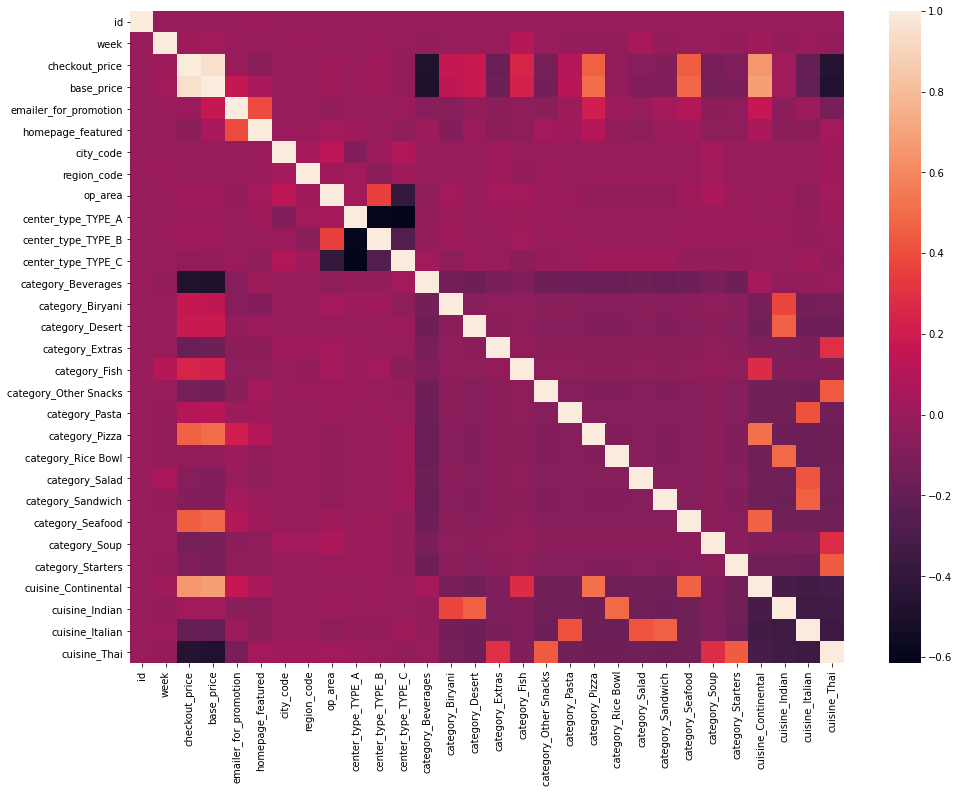

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr())

In [13]:
Pred_id=X_test.id
columns_to_drop=['base_price','id']
X.drop(['base_price'],axis=1,inplace=True)
X_test.drop(['base_price'],axis=1,inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(X,y)

In [15]:
from xgboost import XGBRegressor
xgb =  XGBRegressor(n_estimators=30)
xgb.fit(x_train,y_train)

[17:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
y_pred = xgb.predict(x_valid)

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 141.06354668228207
Mean Squared Error: 73071.1911701629
Root Mean Squared Error: 270.3168347886659


In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor(n_estimators=30)
xgb1.fit(X.values,np.array(y))

[12:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

y_preds=xgb1.predict(X_test.values)
np.sum(y_preds<0)

0

In [ ]:
y_preds

array([206.83058, 206.83058, 206.83058, ...,  91.20691,  91.20691,
        91.20691], dtype=float32)